In [1]:
!python --version


Python 3.11.3


In [2]:
import pandas as pd
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pd.options.display.max_columns = None
df = pd.read_csv('data/churn/churn.csv', delimiter=',')
print(df.shape)

(10000, 18)


In [4]:
# Anonymisation
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# France only
df = df[df.Geography == "France"]
df = df.drop(["Geography"], axis = 1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,5014.0,649.668329,97.016799,350.00,582.00,653.00,717.0000,850.00
Age,5014.0,38.511767,10.469459,18.00,31.00,37.00,43.0000,92.00
Tenure,5014.0,5.004587,2.888475,0.00,2.00,5.00,7.0000,10.00
Balance,5014.0,62092.636516,64133.565524,0.00,0.00,62153.50,121444.8775,238387.56
NumOfProducts,5014.0,1.530913,0.570347,1.00,1.00,1.00,2.0000,4.00
HasCrCard,5014.0,0.706621,0.455356,0.00,0.00,1.00,1.0000,1.00
IsActiveMember,5014.0,0.516753,0.499769,0.00,0.00,1.00,1.0000,1.00
EstimatedSalary,5014.0,99899.180814,57336.289016,90.07,51399.19,99132.31,149295.3600,199929.17
Exited,5014.0,0.161747,0.368255,0.00,0.00,0.00,0.0000,1.00
Complain,5014.0,0.161947,0.368439,0.00,0.00,0.00,0.0000,1.00


In [5]:
my_report = sweetviz.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


CreditScore            441
Gender                   2
Age                     68
Tenure                  11
Balance               2597
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       5014
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           784
dtype: int64


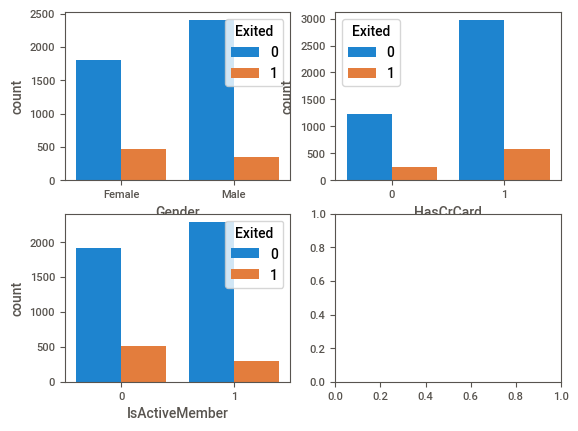

In [6]:
# Discretisation?
print(df.nunique())

# Etude pragmatique sur valeurs discretes (categorielles)
fig, axarr = plt.subplots(2, 2)
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][0])
plt.show()

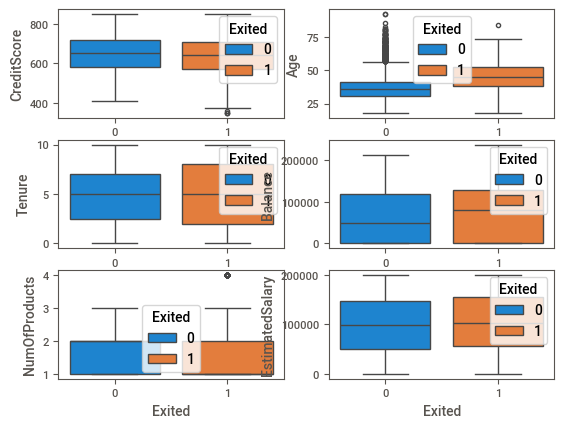

In [7]:
# Etude pragmatique sur valeurs continues
fig, axarr = plt.subplots(3, 2)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
plt.show()

In [8]:
# Ingenieurie de la data
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
df['TenureByAge'] = df.Tenure/(df.Age) # Tenure = mandat
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0.000000,0.047619,14.738095
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1.401375,0.190476,11.952381
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0.000000,0.025641,17.923077
6,822,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206,0.000000,0.140000,16.440000
8,501,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251,1.895518,0.090909,11.386364


In [9]:
# Reordonne pour avoir les valeurs discretes à droite
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Gender']
df = df[['Exited'] + continuous_vars + cat_vars]

# Valeur numérique
df.loc[df.Gender == "Male", 'Gender'] = 1
df.loc[df.Gender == "Female", 'Gender'] = 0
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,0
6,0,822,50,7,0.00,2,10062.80,0.000000,0.140000,16.440000,1,1,1
8,0,501,44,4,142051.07,2,74940.50,1.895518,0.090909,11.386364,0,1,1


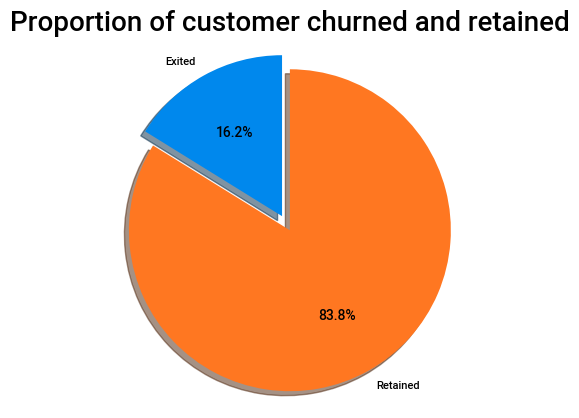

In [10]:
# Equilibrage
# Proportion de churn
labels = 'Exited', 'Retained'
sizes = [df.Exited[df.Exited==1].count(), df.Exited[df.Exited==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [11]:
# Equilibrage
nb = len(df[df.Exited==1])
df = pd.concat([df[df.Exited==1], df[df.Exited==0][:nb]])

In [12]:
# Sauvegarde
df.to_csv("data/churn/churn_clean.csv", index=False)

In [13]:
# Apprentissage
import pandas as pd
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import random
import sklearn.linear_model as lm
import sklearn.neighbors as nn
import sklearn.svm as svm
import pickle
import sklearn.ensemble as rf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

random.seed(0)

In [14]:
df = pd.read_csv('data/churn/churn_clean.csv', delimiter=',')
y = df.Exited
x = df.drop(["Exited"], axis=1)

In [15]:
# Normalisation
scaler = pp.RobustScaler()
scaler.fit(x.values)
x = scaler.transform(x.values)
x

array([[-0.19565217,  0.14285714, -0.63157895, ...,  0.        ,
         1.        , -1.        ],
       [-1.04347826,  0.14285714,  0.63157895, ...,  0.        ,
         0.        , -1.        ],
       [-1.23913043,  0.35714286, -1.05263158, ...,  0.        ,
         0.        , -1.        ],
       ...,
       [-0.45652174,  0.28571429,  0.63157895, ...,  0.        ,
         1.        , -1.        ],
       [-0.7173913 , -0.14285714,  0.        , ..., -1.        ,
         1.        , -1.        ],
       [ 1.4057971 , -0.07142857, -0.84210526, ...,  0.        ,
         0.        , -1.        ]])

In [16]:
# Train test
xtrain, xtest, ytrain, ytest = ms.train_test_split(x, y, train_size=0.8, test_size=0.2)
print(xtrain.shape, xtest.shape)

(1297, 12) (325, 12)


In [17]:
# Linear Model
model = lm.LinearRegression()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")

Score: 0.15178507450449463


In [18]:
#KNN
model = nn.KNeighborsClassifier()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")
with open("data/churn/churn_knn.pickle", "wb") as f:
    pickle.dump((scaler, model), f)

Score: 0.7076923076923077


In [19]:
# SVM
model = svm.SVC()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")

Score: 0.6861538461538461


In [20]:
# Random Forest
model = rf.RandomForestClassifier()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")
with open("data/churn/churn_rf.pickle", "wb") as f:
    pickle.dump((scaler, model), f)

Score: 0.7107692307692308


In [21]:
# Scores
ypred = model.predict(xtest)
print(classification_report(ytest,  ypred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       159
           1       0.73      0.68      0.71       166

    accuracy                           0.71       325
   macro avg       0.71      0.71      0.71       325
weighted avg       0.71      0.71      0.71       325



[0.09899416 0.17185961 0.05324597 0.07722247 0.0952705  0.09707848
 0.06765635 0.09303296 0.16287958 0.01378326 0.04269015 0.02628652]


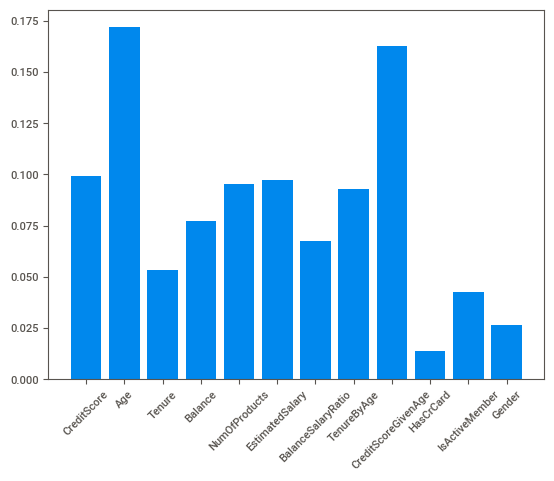

In [22]:
# Features Importances
print(model.feature_importances_)
plt.bar(df.columns[1:], model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [23]:
# Graphviz
from sklearn.tree import export_graphviz
export_graphviz(model.estimators_[0],
                 out_file='data/churn/churn.dot',
                 feature_names = df.columns[1:],
                 class_names = ["0", "1"],
                 rounded = True, proportion = False,
                 precision = 2, filled = True)

In [24]:
# Neural Network
import sklearn.neural_network as nn
model = nn.MLPClassifier(hidden_layer_sizes=(15,15,15,15))
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")

ypred = model.predict(xtest)
print(classification_report(ytest,  ypred))

with open("data/churn/churn_mlp.pickle", "wb") as f:
    pickle.dump((scaler, model), f)

Score: 0.7323076923076923
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       159
           1       0.75      0.71      0.73       166

    accuracy                           0.73       325
   macro avg       0.73      0.73      0.73       325
weighted avg       0.73      0.73      0.73       325



C:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
